# 0.) Import the Credit Card Fraud Data From CCLE

In [2]:
pip install google

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("fraudTest.csv")

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

<ipython-input-8-d5842cbc8f12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-8-d5842cbc8f12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [13]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [24]:
pip uninstall imbalanced-learn -y


Found existing installation: imbalanced-learn 0.12.0
Uninstalling imbalanced-learn-0.12.0:
  Successfully uninstalled imbalanced-learn-0.12.0


In [25]:
pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.4.0
Uninstalling scikit-learn-1.4.0:
  Successfully uninstalled scikit-learn-1.4.0


In [26]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [27]:
pip install scikit-learn


  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [1]:
pip install imbalanced-learn


  Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)


In [2]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


scikit-learn version: 1.4.0
imbalanced-learn version: 0.12.0


In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [15]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [16]:
len(y_train)

389003

In [17]:
sum((y_train==1))

1512

In [18]:
len(over_y)

774982

# 3.) Train three logistic regression models

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [21]:
over_log.score(X_test, y_test)

0.9154130377408287

In [22]:
under_log.score(X_test, y_test)

0.8950310708030423

In [23]:
smote_log.score(X_test, y_test)

0.9123059574365988

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
y_true = y_test

In [26]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76058,  6967],
       [   84,   249]])

In [27]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7477477477477478


In [28]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74358,  8667],
       [   83,   250]])

In [29]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7507507507507507


In [30]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75799,  7226],
       [   84,   249]])

In [31]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7477477477477478


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [32]:
raw_temp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis =1)
raw_temp.columns = list(X.columns) + ["is_fraud"]

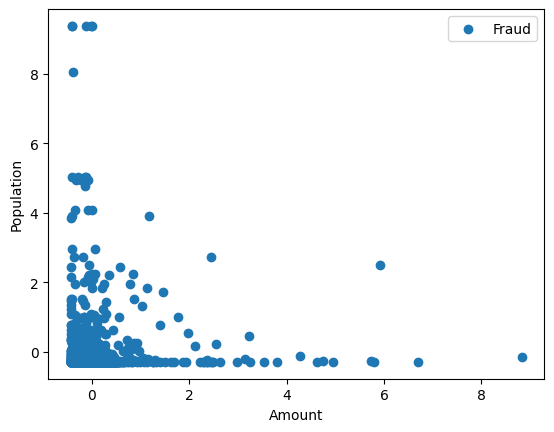

In [33]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [34]:
raw_temp = pd.concat([pd.DataFrame(smote_X), pd.DataFrame(smote_y)], axis =1)
raw_temp.columns = list(X.columns) + ["is_fraud"]

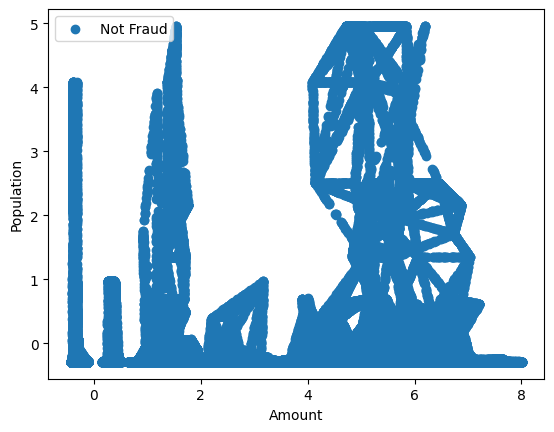

In [35]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [37]:
resampling_methods={
    "over":RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote":SMOTE()
}
model_configs={
    "LOG": LogisticRegression(),
    "LASSO": LogisticRegression(penalty="l1",C=.5, solver="liblinear" ),
    "decisiontree": DecisionTreeClassifier()
}

In [38]:
def calc_perf_metrics(y_true,y_pred):
  tn,fp,fn,tp=confusion_matrix(y_true,y_pred).ravel()
  print(f"Precision :{tp/(tp+fp)}")
  print(f"Recall: {tp/(tp+fn)}")
  print(f"F1 Score : {2 * (tp / (tp + fp) * tp / (tp + fn)) / (tp / (tp + fp) + tp / (tp + fn))}")

In [39]:
trained_models={}

In [40]:
for resample_key,resampler in resampling_methods.items():
  resample_X,resample_y=resampler.fit_resample(X_train,y_train)
  for model_name, model in model_configs.items():
    combined_key= f"{resample_key}_{model_name}"
    trained_models[combined_key]=model.fit(resample_X,resample_y)
    print(f"{combined_key}: ")
    y_pred=model.predict(X_test)
    calc_perf_metrics(y_test,y_pred)

over_LOG: 
Precision :0.035105033131256166
Recall: 0.7477477477477478
F1 Score : 0.06706167519525989
over_LASSO: 
Precision :0.03507536272714467
Recall: 0.7477477477477478
F1 Score : 0.0670075349838536
over_decisiontree: 
Precision :0.6198630136986302
Recall: 0.5435435435435435
F1 Score : 0.5791999999999999
under_LOG: 
Precision :0.033622559652928416
Recall: 0.7447447447447447
F1 Score : 0.06434038137242185
under_LASSO: 
Precision :0.03495419309372798
Recall: 0.7447447447447447
F1 Score : 0.06677436725901993
under_decisiontree: 
Precision :0.06515463917525773
Recall: 0.948948948948949
F1 Score : 0.12193710206444143
smote_LOG: 
Precision :0.03395608891313241
Recall: 0.7477477477477478
F1 Score : 0.06496217062353248
smote_LASSO: 
Precision :0.033942202835332606
Recall: 0.7477477477477478
F1 Score : 0.06493675837788498
smote_decisiontree: 
Precision :0.27855477855477856
Recall: 0.7177177177177178
F1 Score : 0.40134340890008396


According to the result above, the over_decisiontree has the highest F1 score, therefore it is the best performed model.

In [41]:
trained_models

{'over_LOG': LogisticRegression(),
 'over_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'over_decisiontree': DecisionTreeClassifier(),
 'under_LOG': LogisticRegression(),
 'under_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'under_decisiontree': DecisionTreeClassifier(),
 'smote_LOG': LogisticRegression(),
 'smote_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'smote_decisiontree': DecisionTreeClassifier()}